In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [10]:

print("\n📊 STEP 1: GENERATING RETAILCHAIN DATA...")
print("-" * 50)

# Generate Store Data
num_stores = 5
stores = []
regions = ['North', 'South', 'East', 'West', 'Central']
store_types = ['Superstore', 'Express', 'Hypermarket']

for i in range(1, num_stores + 1):
    store = {
        'store_id': f'STORE_{i:03d}',
        'region': random.choice(regions),
        'store_type': random.choice(store_types),
        'size_sqft': random.randint(5000, 50000),
        'opening_date': datetime(2015, 1, 1) + timedelta(days=random.randint(0, 2000))
    }
    stores.append(store)
stores_df = pd.DataFrame(stores)
print(f"✓ Generated {len(stores_df)} stores")

# Generate Product Data
num_products = 50
categories = ['Electronics', 'Clothing', 'Food', 'Home & Garden', 'Sports']
subcategories = {
    'Electronics': ['Laptops', 'Phones', 'Accessories', 'TVs'],
    'Clothing': ['Men', 'Women', 'Kids', 'Footwear'],
    'Food': ['Fresh', 'Frozen', 'Pantry', 'Beverages'],
    'Home & Garden': ['Furniture', 'Kitchen', 'Garden', 'Decor'],
    'Sports': ['Equipment', 'Clothing', 'Outdoor', 'Fitness']
}

products = []
for i in range(1, num_products + 1):
    category = random.choice(categories)
    product = {
        'product_id': f'PROD_{i:04d}',
        'product_name': f'Product_{i}',
        'category': category,
        'subcategory': random.choice(subcategories[category]),
        'unit_price': round(random.uniform(5, 500), 2),
        'cost_price': round(random.uniform(3, 400), 2),
        'supplier': f'SUPPLIER_{random.randint(1, 20):02d}',
        'stock_quantity': random.randint(0, 1000)
    }
    products.append(product)
products_df = pd.DataFrame(products)
print(f"✓ Generated {len(products_df)} products across 5 categories")

# Generate Customer Data
num_customers = 200
customers = []
membership_tiers = ['Bronze', 'Silver', 'Gold', 'Platinum']

for i in range(1, num_customers + 1):
    customer = {
        'customer_id': f'CUST_{i:05d}',
        'age': random.randint(18, 80),
        'gender': random.choice(['M', 'F', 'Other']),
        'membership_tier': random.choices(membership_tiers, weights=[0.5, 0.3, 0.15, 0.05])[0],
        'join_date': datetime(2018, 1, 1) + timedelta(days=random.randint(0, 1000)),
        'loyalty_points': random.randint(0, 5000),
        'preferred_store': f'STORE_{random.randint(1, num_stores):03d}'
    }
    customers.append(customer)
customers_df = pd.DataFrame(customers)
print(f"✓ Generated {len(customers_df)} loyalty customers")

# Generate Sales Transactions
num_transactions = 5000
transactions = []
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 31)

for i in range(num_transactions):
    timestamp = start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds()))
    )
    
    store = stores_df.sample(1).iloc[0]
    product = products_df.sample(1).iloc[0]
    
    if random.random() < 0.6:
        customer = customers_df.sample(1).iloc[0]
        customer_id = customer['customer_id']
        membership_tier = customer['membership_tier']
    else:
        customer_id = None
        membership_tier = 'Guest'
    
    quantity = random.randint(1, 5)
    discount = random.choices([0, 0.1, 0.15, 0.2], weights=[0.7, 0.15, 0.1, 0.05])[0]
    
    transaction = {
        'transaction_id': f'TXN_{i:08d}',
        'timestamp': timestamp,
        'date': timestamp.date(),
        'time_hour': timestamp.hour,
        'day_of_week': timestamp.weekday(),
        'store_id': store['store_id'],
        'store_region': store['region'],
        'product_id': product['product_id'],
        'category': product['category'],
        'unit_price': product['unit_price'],
        'quantity': quantity,
        'discount_applied': discount,
        'net_sales': round(product['unit_price'] * quantity * (1 - discount), 2),
        'customer_id': customer_id,
        'membership_tier': membership_tier,
        'payment_method': random.choice(['Cash', 'Card', 'Mobile'])
    }
    transactions.append(transaction)

sales_df = pd.DataFrame(transactions)
print(f"✓ Generated {len(sales_df):,} sales transactions (3 months of data)")


📊 STEP 1: GENERATING RETAILCHAIN DATA...
--------------------------------------------------
✓ Generated 5 stores
✓ Generated 50 products across 5 categories
✓ Generated 200 loyalty customers
✓ Generated 5,000 sales transactions (3 months of data)


In [11]:
print("\n" + "=" * 80)
print("📊 BIG DATA 5 Vs ANALYSIS IN RETAIL CONTEXT")
print("=" * 80)

# Volume
print("\n📈 VOLUME:")
print(f"   • Total transactions: {len(sales_df):,}")
print(f"   • Daily average: {len(sales_df)/90:.0f} transactions")
print(f"   • Total data points: {sales_df.shape[0] * sales_df.shape[1]:,}")
print(f"   • Memory usage: {sales_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Velocity
print("\n⚡ VELOCITY:")
hourly_dist = sales_df.groupby('time_hour').size()
peak_hour = hourly_dist.idxmax()
print(f"   • Peak hour: {peak_hour}:00 with {hourly_dist.max()} transactions")
print(f"   • Average per hour: {hourly_dist.mean():.1f} transactions")
print(f"   • Busiest periods: {', '.join([f'{h}:00' for h in hourly_dist.nlargest(3).index])}")

# Variety
print("\n🎯 VARIETY:")
print(f"   • Data types: {len(sales_df.columns)} different attributes")
print(f"   • Sources integrated: Store, Product, Customer, Transaction")
print(f"   • Data formats: Structured (tabular), Temporal (timestamps), Categorical")

# Veracity
print("\n🔍 VERACITY:")
missing_data = sales_df['customer_id'].isnull().sum()
print(f"   • Guest transactions (no customer data): {missing_data} ({missing_data/len(sales_df)*100:.1f}%)")
print(f"   • Data completeness: {(1 - sales_df.isnull().sum().sum()/(sales_df.shape[0]*sales_df.shape[1]))*100:.1f}%")

# Value
print("\n💰 VALUE:")
total_revenue = sales_df['net_sales'].sum()
avg_basket = sales_df.groupby('transaction_id')['net_sales'].sum().mean()
print(f"   • Total revenue: £{total_revenue:,.2f}")
print(f"   • Average transaction: £{avg_basket:.2f}")
print(f"   • Total profit (estimated): £{total_revenue * 0.3:,.2f}")


📊 BIG DATA 5 Vs ANALYSIS IN RETAIL CONTEXT

📈 VOLUME:
   • Total transactions: 5,000
   • Daily average: 56 transactions
   • Total data points: 80,000
   • Memory usage: 2627.23 KB

⚡ VELOCITY:
   • Peak hour: 17:00 with 233 transactions
   • Average per hour: 208.3 transactions
   • Busiest periods: 17:00, 20:00, 22:00

🎯 VARIETY:
   • Data types: 16 different attributes
   • Sources integrated: Store, Product, Customer, Transaction
   • Data formats: Structured (tabular), Temporal (timestamps), Categorical

🔍 VERACITY:
   • Guest transactions (no customer data): 2002 (40.0%)
   • Data completeness: 97.5%

💰 VALUE:
   • Total revenue: £3,835,307.72
   • Average transaction: £767.06
   • Total profit (estimated): £1,150,592.32


In [12]:
print("\n" + "=" * 80)
print("📊 BATCH PROCESSING - Strategic Analytics")
print("=" * 80)

# Category performance
category_sales = sales_df.groupby('category').agg({
    'net_sales': 'sum',
    'transaction_id': 'count',
    'quantity': 'sum'
}).round(2)

category_sales['avg_ticket'] = (category_sales['net_sales'] / category_sales['transaction_id']).round(2)
category_sales['market_share'] = (category_sales['net_sales'] / category_sales['net_sales'].sum() * 100).round(1)

print("\n📈 Category Performance Summary:")
print("-" * 60)
print(category_sales.to_string())
print("-" * 60)

# Regional performance
region_sales = sales_df.groupby('store_region').agg({
    'net_sales': 'sum',
    'transaction_id': 'count'
}).round(2)

region_sales['sales_per_store'] = region_sales['net_sales'] / len(stores_df)
print("\n📍 Regional Performance:")
print(region_sales)


📊 BATCH PROCESSING - Strategic Analytics

📈 Category Performance Summary:
------------------------------------------------------------
                net_sales  transaction_id  quantity  avg_ticket  market_share
category                                                                     
Clothing        450628.47             791      2393      569.69          11.7
Electronics     812068.86            1018      3071      797.71          21.2
Food            294270.12             604      1831      487.20           7.7
Home & Garden   929714.46             992      2956      937.21          24.2
Sports         1348625.81            1595      4793      845.53          35.2
------------------------------------------------------------

📍 Regional Performance:
               net_sales  transaction_id  sales_per_store
store_region                                             
Central        798224.00            1009       159644.800
North         1578384.71            2067       315676.942


In [13]:
print("\n" + "=" * 80)
print("⚡ STREAM PROCESSING - Real-time Monitoring Simulation")
print("=" * 80)

# Simulate last hour of trading
current_time = datetime.now()
recent_data = sales_df[sales_df['time_hour'] == current_time.hour].head(10)

if len(recent_data) > 0:
    print(f"\n🕐 Real-time Feed (Last {len(recent_data)} transactions):")
    for idx, row in recent_data.iterrows():
        print(f"   • {row['timestamp'].strftime('%H:%M:%S')} - {row['store_id']} - "
              f"{row['category']} - £{row['net_sales']:.2f} ({row['payment_method']})")
else:
    print(f"\n⚠️ Simulating real-time data for hour {current_time.hour}:00")
    print("   [Stream processing would show live transactions here]")


⚡ STREAM PROCESSING - Real-time Monitoring Simulation

🕐 Real-time Feed (Last 10 transactions):
   • 01:23:54 - STORE_002 - Food - £532.71 (Mobile)
   • 01:42:04 - STORE_005 - Sports - £512.52 (Card)
   • 01:10:30 - STORE_005 - Electronics - £695.55 (Cash)
   • 01:22:41 - STORE_004 - Food - £295.49 (Mobile)
   • 01:02:54 - STORE_005 - Home & Garden - £442.92 (Mobile)
   • 01:58:12 - STORE_004 - Sports - £2338.40 (Card)
   • 01:29:07 - STORE_002 - Sports - £2338.40 (Mobile)
   • 01:41:16 - STORE_005 - Electronics - £774.94 (Card)
   • 01:36:18 - STORE_001 - Sports - £1281.50 (Cash)
   • 01:27:22 - STORE_005 - Sports - £552.57 (Card)


In [14]:
print("\n" + "=" * 80)
print("🤖 PREDICTIVE ANALYTICS - Sales Forecasting Model")
print("=" * 80)

# Prepare features for prediction
daily_sales = sales_df.groupby('date').agg({
    'net_sales': 'sum',
    'transaction_id': 'count',
    'quantity': 'sum'
}).reset_index()

daily_sales['day_of_week'] = pd.to_datetime(daily_sales['date']).dt.dayofweek
daily_sales['day_of_month'] = pd.to_datetime(daily_sales['date']).dt.day
daily_sales['month'] = pd.to_datetime(daily_sales['date']).dt.month
daily_sales['is_weekend'] = (daily_sales['day_of_week'] >= 5).astype(int)

# Prepare features and target
features = ['day_of_week', 'day_of_month', 'month', 'is_weekend', 'transaction_id', 'quantity']
X = daily_sales[features]
y = daily_sales['net_sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"   • Mean Absolute Error: £{mae:.2f}")
print(f"   • R² Score: {r2:.3f}")
print(f"   • Accuracy: {(1 - mae/y_test.mean())*100:.1f}%")

print(f"\n🔑 Key Sales Drivers (Feature Importance):")
for feature, importance in sorted(zip(features, model.feature_importances_), 
                                  key=lambda x: x[1], reverse=True):
    print(f"   • {feature}: {importance:.3f}")


🤖 PREDICTIVE ANALYTICS - Sales Forecasting Model

📊 Model Performance:
   • Mean Absolute Error: £3995.67
   • R² Score: 0.628
   • Accuracy: 91.1%

🔑 Key Sales Drivers (Feature Importance):
   • quantity: 0.781
   • transaction_id: 0.091
   • day_of_month: 0.075
   • day_of_week: 0.029
   • month: 0.020
   • is_weekend: 0.004



📈 GENERATING VISUALIZATIONS...


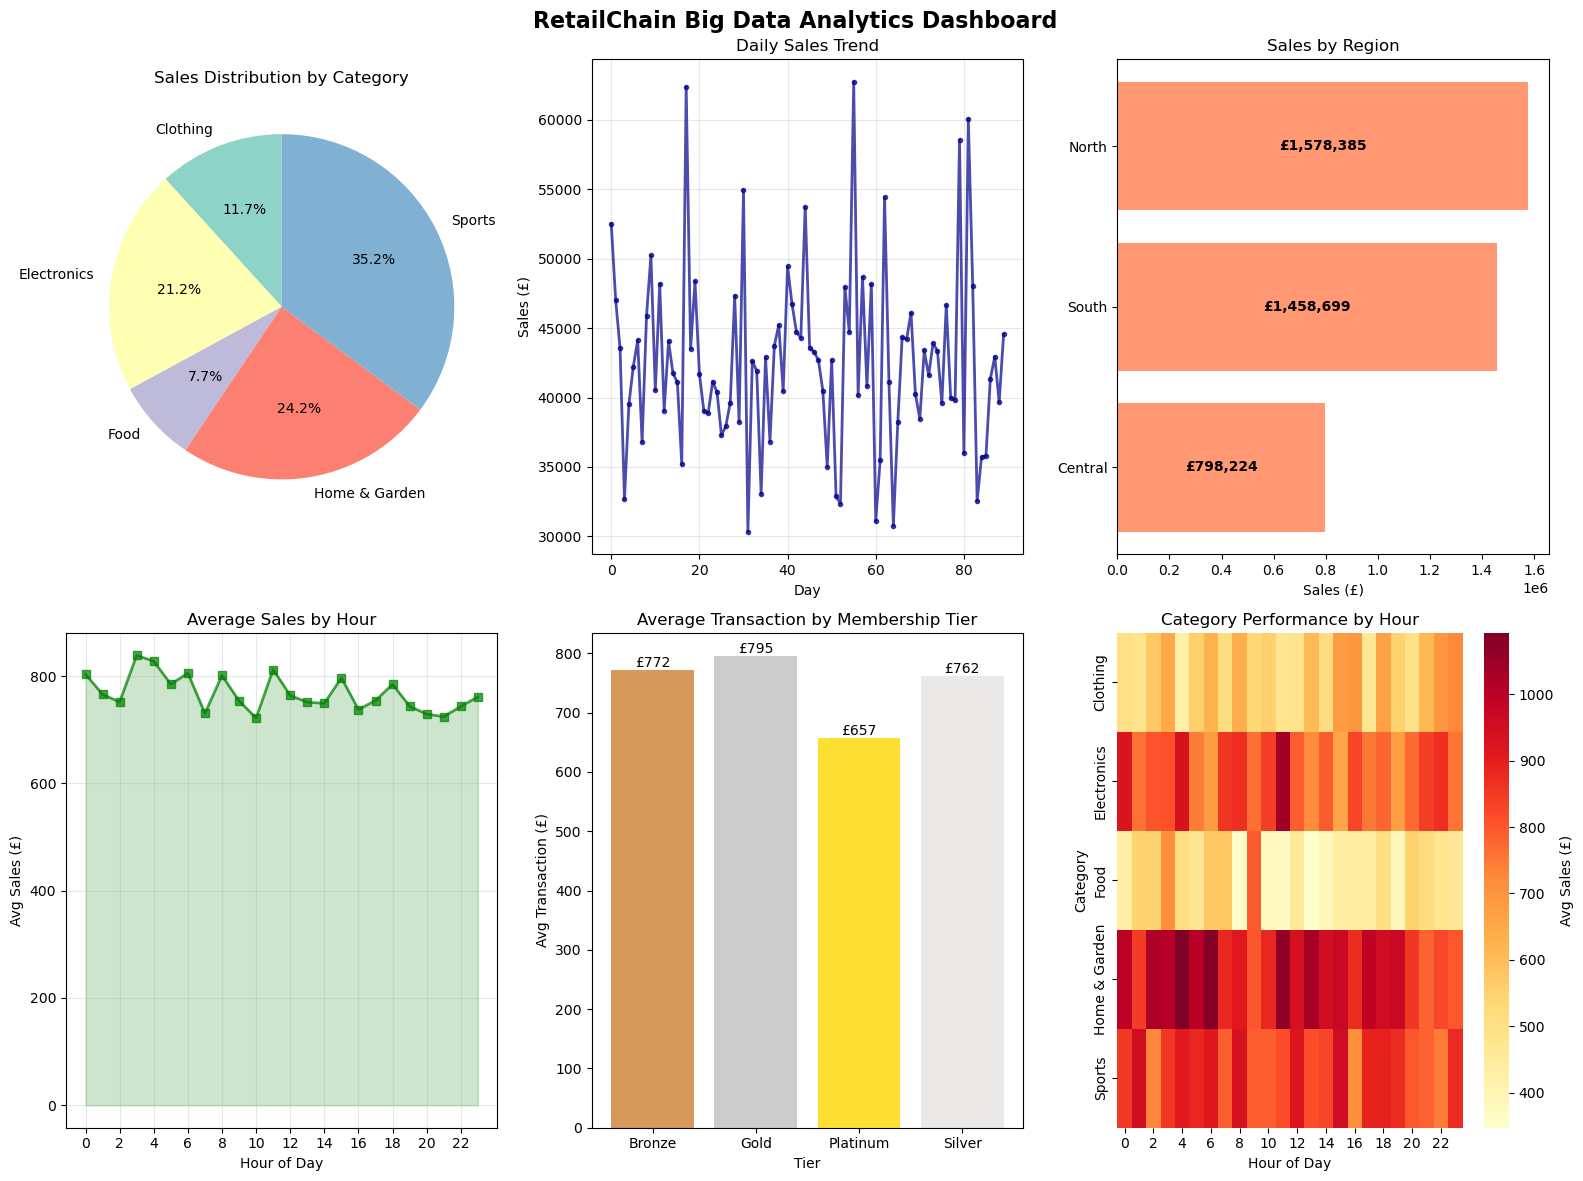

In [15]:
print("\n" + "=" * 80)
print("📈 GENERATING VISUALIZATIONS...")
print("=" * 80)

# Create a figure with subplots
fig = plt.figure(figsize=(16, 12))
fig.suptitle('RetailChain Big Data Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Sales by Category (Pie Chart)
ax1 = plt.subplot(2, 3, 1)
category_totals = sales_df.groupby('category')['net_sales'].sum()
colors = plt.cm.Set3(range(len(category_totals)))
wedges, texts, autotexts = ax1.pie(category_totals.values, labels=category_totals.index, 
                                    autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Sales Distribution by Category', fontsize=12)

# 2. Daily Sales Trend
ax2 = plt.subplot(2, 3, 2)
daily_trend = sales_df.groupby('date')['net_sales'].sum()
ax2.plot(range(len(daily_trend)), daily_trend.values, marker='o', markersize=3, 
         linewidth=2, color='darkblue', alpha=0.7)
ax2.set_title('Daily Sales Trend', fontsize=12)
ax2.set_xlabel('Day')
ax2.set_ylabel('Sales (£)')
ax2.grid(True, alpha=0.3)

# 3. Sales by Region
ax3 = plt.subplot(2, 3, 3)
region_totals = sales_df.groupby('store_region')['net_sales'].sum().sort_values()
bars = ax3.barh(range(len(region_totals)), region_totals.values, color='coral', alpha=0.8)
ax3.set_yticks(range(len(region_totals)))
ax3.set_yticklabels(region_totals.index)
ax3.set_title('Sales by Region', fontsize=12)
ax3.set_xlabel('Sales (£)')
for i, (region, value) in enumerate(region_totals.items()):
    ax3.text(value/2, i, f'£{value:,.0f}', va='center', ha='center', fontweight='bold')

# 4. Hourly Sales Pattern
ax4 = plt.subplot(2, 3, 4)
hourly_avg = sales_df.groupby('time_hour')['net_sales'].mean()
ax4.plot(hourly_avg.index, hourly_avg.values, marker='s', linewidth=2, color='green', alpha=0.7)
ax4.fill_between(hourly_avg.index, hourly_avg.values, alpha=0.2, color='green')
ax4.set_title('Average Sales by Hour', fontsize=12)
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Avg Sales (£)')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(0, 24, 2))

# 5. Customer Membership Analysis
ax5 = plt.subplot(2, 3, 5)
tier_analysis = sales_df[sales_df['membership_tier'] != 'Guest'].groupby('membership_tier').agg({
    'net_sales': 'mean',
    'transaction_id': 'count'
}).round(2)
tier_colors = ['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2']  # Bronze, Silver, Gold, Platinum
bars = ax5.bar(tier_analysis.index, tier_analysis['net_sales'], color=tier_colors, alpha=0.8)
ax5.set_title('Average Transaction by Membership Tier', fontsize=12)
ax5.set_xlabel('Tier')
ax5.set_ylabel('Avg Transaction (£)')
for bar, tier in zip(bars, tier_analysis.index):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'£{height:.0f}', ha='center', va='bottom')

# 6. Product Category Performance Heatmap
ax6 = plt.subplot(2, 3, 6)
pivot_table = sales_df.pivot_table(
    values='net_sales', 
    index='category', 
    columns='time_hour', 
    aggfunc='mean',
    fill_value=0
)
sns.heatmap(pivot_table, ax=ax6, cmap='YlOrRd', cbar_kws={'label': 'Avg Sales (£)'})
ax6.set_title('Category Performance by Hour', fontsize=12)
ax6.set_xlabel('Hour of Day')
ax6.set_ylabel('Category')

plt.tight_layout()
plt.show()

In [16]:
print("\n" + "=" * 80)
print("🔧 TECHNOLOGY EVALUATION AND RECOMMENDATIONS")
print("=" * 80)

print("""
📊 Architecture Comparison:

┌─────────────────┬───────────────────┬───────────────────┬────────────────────┐
│ Aspect          │ Lambda Architecture│ Kappa Architecture│ Traditional DW     │
├─────────────────┼───────────────────┼───────────────────┼────────────────────┤
│ Processing Type │ Batch + Stream    │ Stream only       │ Batch only         │
│ Latency         │ Minutes to Real-time │ Real-time      │ Hours/Days         │
│ Use Case        │ Comprehensive     │ Real-time apps    │ Historical reports │
│ Tools           │ Spark, Kafka      │ Kafka, Flink      │ SQL Databases      │
│ Cost            │ High              │ Medium            │ Low-Medium         │
└─────────────────┴───────────────────┴───────────────────┴────────────────────┘
""")


🔧 TECHNOLOGY EVALUATION AND RECOMMENDATIONS

📊 Architecture Comparison:

┌─────────────────┬───────────────────┬───────────────────┬────────────────────┐
│ Aspect          │ Lambda Architecture│ Kappa Architecture│ Traditional DW     │
├─────────────────┼───────────────────┼───────────────────┼────────────────────┤
│ Processing Type │ Batch + Stream    │ Stream only       │ Batch only         │
│ Latency         │ Minutes to Real-time │ Real-time      │ Hours/Days         │
│ Use Case        │ Comprehensive     │ Real-time apps    │ Historical reports │
│ Tools           │ Spark, Kafka      │ Kafka, Flink      │ SQL Databases      │
│ Cost            │ High              │ Medium            │ Low-Medium         │
└─────────────────┴───────────────────┴───────────────────┴────────────────────┘

